In [12]:
import numpy as np
from pylab import *
from craco.cardcap import CardcapFile
from craco.card_averager import Averager
from craco.cardcapmerger import CcapMerger
from astropy.io import fits
import glob
import craco
import craft.craco_plan

from craft import uvfits

from craft.craco import printstats,bl2ant
import logging
import time
import scipy

%matplotlib notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
nbeam = 36
nant = 30
nc = 4*6
nt = 64
npol = 1
fscrunch = 6
tscrunch = 1
avg = Averager(nbeam, nant, nc, nt, npol, fscrunch, tscrunch)

In [10]:
files = sorted(glob.glob('/data/seren-01/fast/craco/SB048354/scans/00/20230220040806/ccap_b02_c01+f?.fits'))
files

['/data/seren-01/fast/craco/SB048354/scans/00/20230220040806/ccap_b02_c01+f1.fits',
 '/data/seren-01/fast/craco/SB048354/scans/00/20230220040806/ccap_b02_c01+f2.fits',
 '/data/seren-01/fast/craco/SB048354/scans/00/20230220040806/ccap_b02_c01+f3.fits',
 '/data/seren-01/fast/craco/SB048354/scans/00/20230220040806/ccap_b02_c01+f4.fits',
 '/data/seren-01/fast/craco/SB048354/scans/00/20230220040806/ccap_b02_c01+f5.fits',
 '/data/seren-01/fast/craco/SB048354/scans/00/20230220040806/ccap_b02_c01+f6.fits']

In [13]:
merger = CcapMerger(files)

In [53]:
piter = merger.packet_iter()

In [54]:
npkts = 16
all_pkts = [next(piter) for i in range(npkts)]

In [55]:
accumulated = [avg.accumulate_packets(pkt[0]) for pkt in all_pkts]

In [56]:
averaged = accumulated[0]


In [57]:
averaged.dtype

dtype([('ics', '<f4', (64, 24)), ('cas', '<f4', (64, 24)), ('vis', '<c8', (465, 4, 64))])

In [59]:
[acc.shape for acc in accumulated]

[(36,),
 (36,),
 (36,),
 (36,),
 (36,),
 (36,),
 (36,),
 (36,),
 (36,),
 (36,),
 (36,),
 (36,),
 (36,),
 (36,),
 (36,),
 (36,)]

In [63]:
cas = np.array([acc['cas'] for acc in accumulated]).transpose((1,0,2,3)).reshape(36, 64*16, 24)
cas.shape

(36, 1024, 24)

<IPython.core.display.Javascript object>


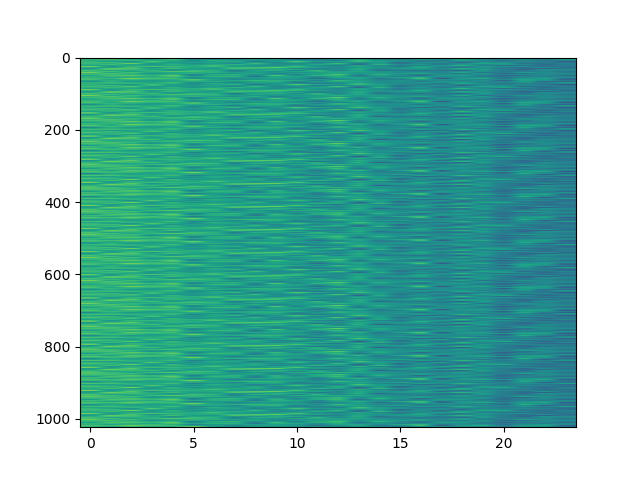

In [66]:
figure()
imshow(cas[0,...], aspect='auto')

<IPython.core.display.Javascript object>


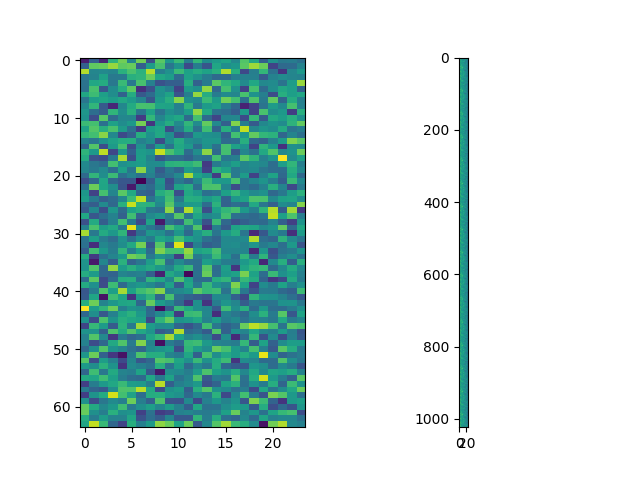

In [51]:
fig, ax = subplots(1,2)
ax[0].imshow(averaged[0]['ics'], aspect='auto')
ax[1].imshow(averaged[0]['cas'], aspect='auto')

In [37]:
averaged[0]['cas']

array([[1580397.6, 1571175.9, 1554549.8, ..., 1649971.1, 1579112.8,
        1557261.5],
       [1496636.1, 1609275. , 1566140.9, ..., 1578184.5, 1540774.6,
        1521642.9],
       [1463035. , 1537901.5, 1506060.8, ..., 1590637. , 1561905. ,
        1608324.6],
       ...,
       [1595929. , 1596521.2, 1624224.2, ..., 1608953.6, 1641200.8,
        1470941.1],
       [1566126.8, 1503210.2, 1593812.5, ..., 1532256.5, 1589682.1,
        1526906.5],
       [1543668. , 1577934.6, 1573884.9, ..., 1494463.4, 1629214.9,
        1539349.6]], dtype=float32)